In [9]:
import matplotlib.pyplot as plt
import stompy.model.schism.schism_model as sch
import numpy as np
import os
%matplotlib notebook

In [16]:
# 
run_dirs=['run007']

In [17]:
run_dir=run_dirs[0]
ms=sch.MultiSchism(os.path.join( run_dir, 'hgrid.gr3'),
                   os.path.join(run_dir,'outputs','schout_*_2.nc'))

<IPython.core.display.Javascript object>


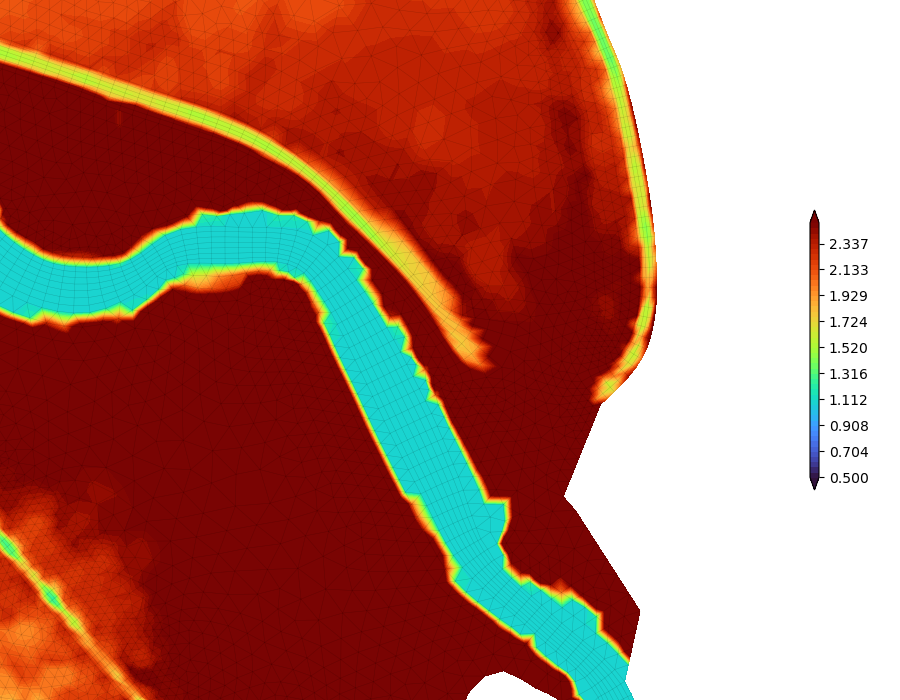

In [18]:
fig,ax=plt.subplots(figsize=(9,7))

ms.grid.plot_edges(color='k',lw=0.3,alpha=0.2)
cset=ms.grid.contourf_node_values(ms.elev.isel(time=-1).values,
                                  np.linspace(0.5,2.5,50),extend='both',cmap='turbo')
ax.axis('off')
ax.set_position([0,0,1,1])
ax.axis('tight')
ax.axis('equal')
cax=fig.add_axes([0.9,0.3,0.01,0.4])
plt.colorbar(cset,cax=cax)

In [19]:
ms.dims

Frozen(SortedKeysDict({'time': 72, 'nSCHISM_hgrid_node': 2818, 'nSCHISM_hgrid_face': 4522, 'nSCHISM_hgrid_edge': 7338, 'nSCHISM_vgrid_layers': 11, 'two': 2}))

In [23]:
ms.wetdry_elem.isel(time=-1).values

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

<IPython.core.display.Javascript object>


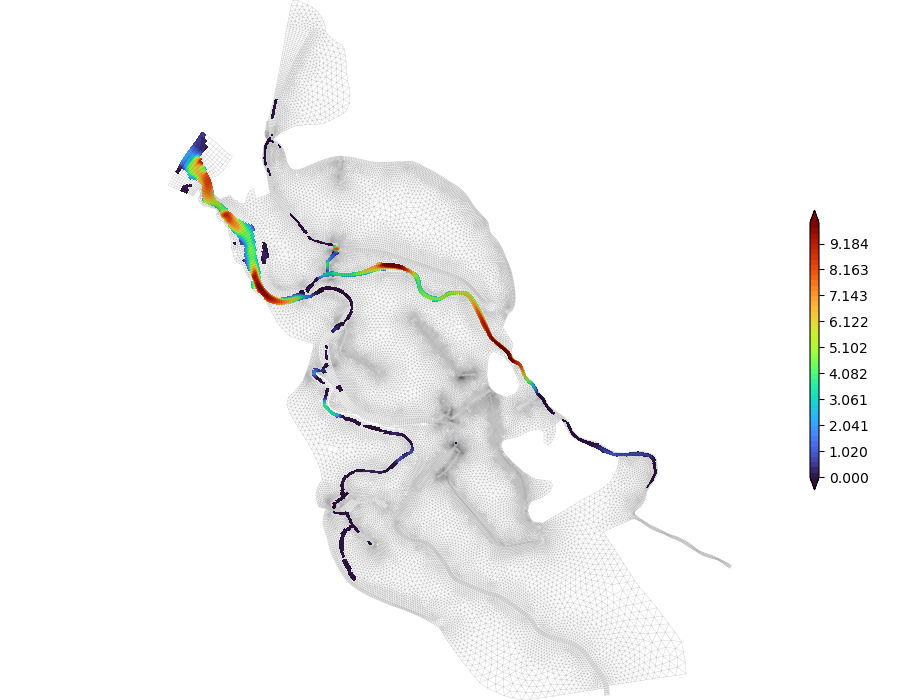

In [34]:
# Surface salinity:
fig,ax=plt.subplots(figsize=(9,7))

ti=50
ms.grid.plot_edges(color='k',lw=0.3,alpha=0.2)
wet_cell=ms.wetdry_elem.isel(time=ti).values<0.5

#data=ms.salt.isel(time=ti,nSCHISM_vgrid_layers=-1).values

s_top=ms.salt.isel(time=ti,nSCHISM_vgrid_layers=-1).values
s_bed=ms.salt.isel(time=ti,nSCHISM_vgrid_layers=0).values
data=s_bed-s_top

cset=ms.grid.contourf_node_values(data,
                                  np.linspace(0,10,50),
                                  tri_kwargs=dict(cell_mask=wet_cell),
                                  extend='both',cmap='turbo')
ax.axis('off')
ax.set_position([0,0,1,1])
ax.axis('tight')
ax.axis('equal')
cax=fig.add_axes([0.9,0.3,0.01,0.4])
plt.colorbar(cset,cax=cax)

<IPython.core.display.Javascript object>


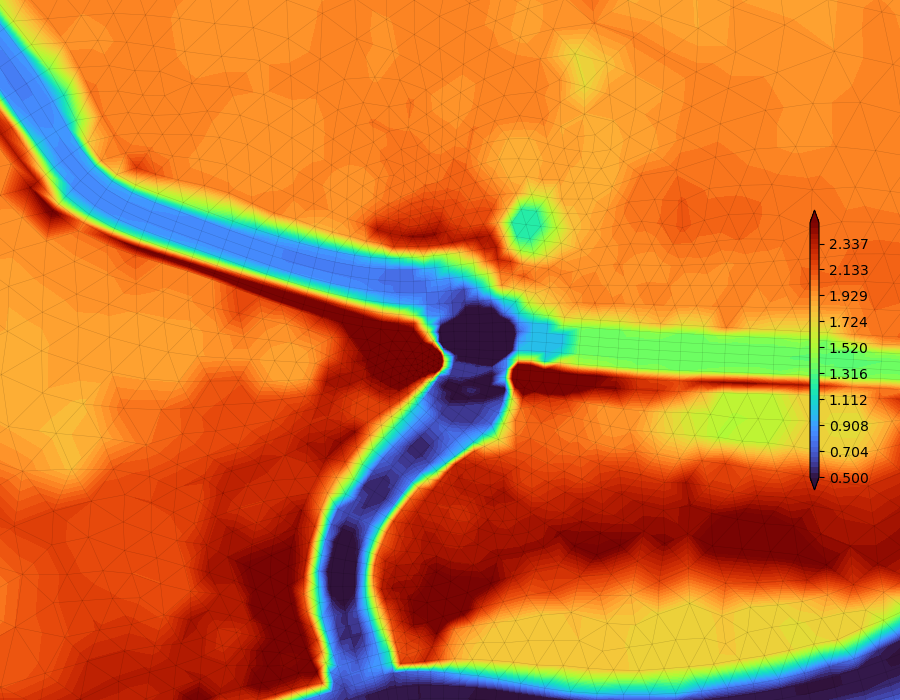

In [15]:
fig,ax=plt.subplots(figsize=(9,7))

ms.grid.plot_edges(color='k',lw=0.3,alpha=0.2)
cset=ms.grid.contourf_node_values(-ms.grid.nodes['depth'],
                                  np.linspace(0.5,2.5,50),extend='both',cmap='turbo')
ax.axis('off')
ax.set_position([0,0,1,1])
ax.axis('tight')
ax.axis('equal')
cax=fig.add_axes([0.9,0.3,0.01,0.4])
plt.colorbar(cset,cax=cax)